In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# Reading the csv Files 
df = pd.read_csv("exercise.csv")
op = pd.read_csv("calories.csv")

# Concating the target column in the dataframe 
df['Calorie'] = op['Calories']
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
# Finding the shape of DataFrame
df.shape

(15000, 9)

In [12]:
# Finding the null values 
df.isnull().sum()
# There are no null values in this DataFrame

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calorie       0
dtype: int64

In [13]:
# Finding the types of Datatypes
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calorie       float64
dtype: object

In [14]:
# Dropping the user ID column because it has no use 
df.drop(['User_ID'], axis='columns', inplace =True)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [15]:
# Finding the information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calorie     15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [16]:
# Converting the Categorical column to numerical column
df.replace({'Gender':{'male':0, 'female':1}}, inplace=True)
df.head()

# Only one categorical column exist so doing it manually instead of Dummoes and OHE to avoid Dummy variable Trap

C:\Users\piyush\AppData\Local\Temp\ipykernel_8396\4106887059.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0, 'female':1}}, inplace=True)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calorie
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
df['Gender'].value_counts()
# There are almost same number of male and females 

Gender
1    7553
0    7447
Name: count, dtype: int64

In [18]:
sns.set()

**Data Distribution**  
*  Finding the PDF or Data Distribution of various column in the DataFrame

C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

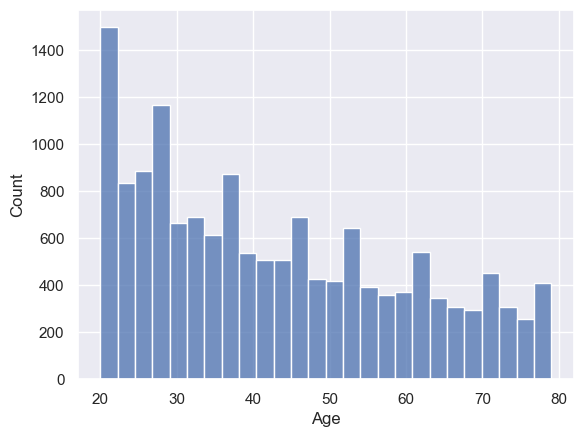

In [19]:
sns.histplot(df['Age'])

C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

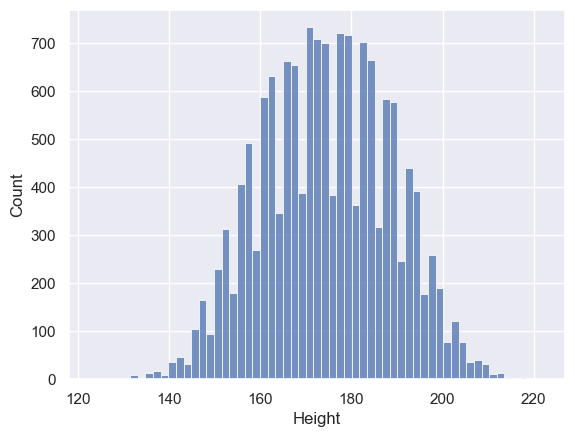

In [20]:
sns.histplot(df['Height'])

C:\Users\piyush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

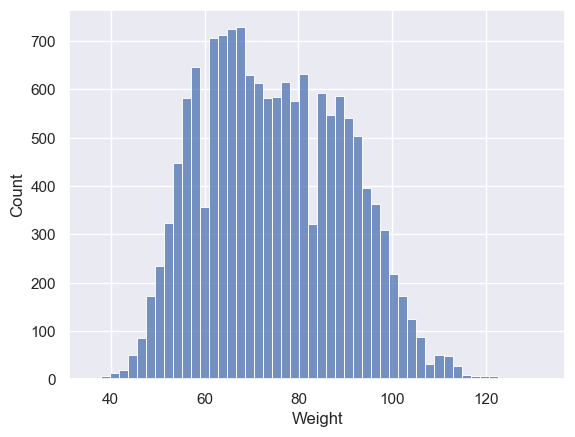

In [21]:
sns.histplot(df['Weight'])

In [22]:
# Finding the correlation of columns with the target variable
correlation = df.corr()

<Axes: >

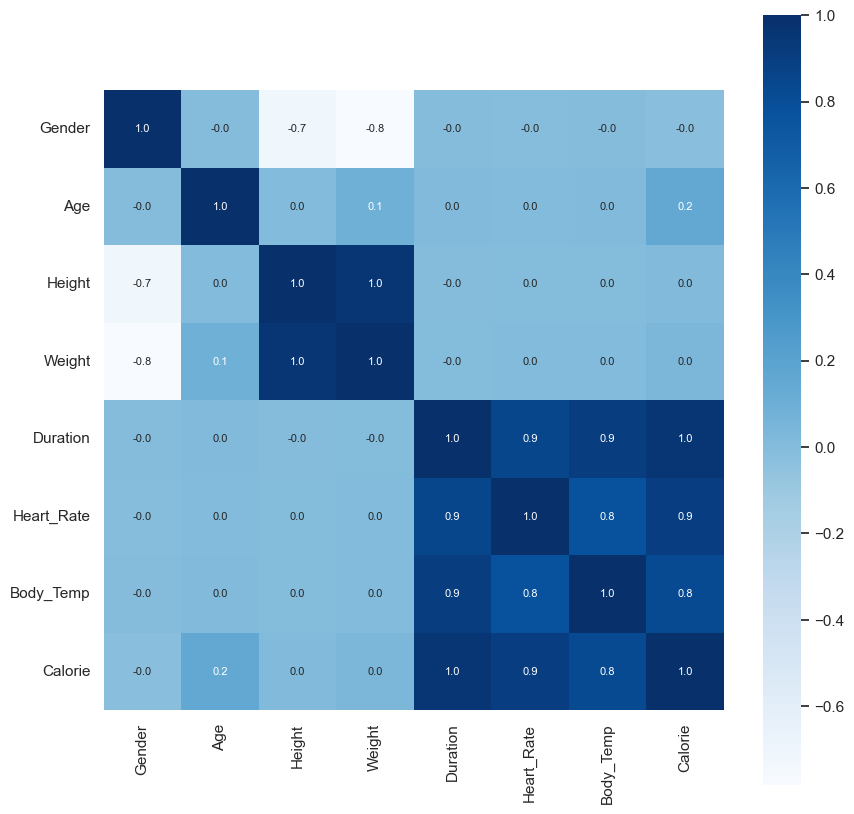

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Conclusion of Above HeatMap
* These Columns are mostly correlated with target column
   1. Duration
   2. Heart_Rate
   3. Body_Temp

In [24]:
# Seperating of the columns
X = df.drop(columns=['Calorie'], axis=1)
Y = df['Calorie']

In [25]:
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [26]:
# Seperating the data in training and testing set
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
# Printing the shape of every set
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


**Simple Linear Regression**

In [28]:
model_lin = LinearRegression()
model_lin.fit(X_train, Y_train)
lin_pred = model_lin.predict(X_test)

mae = metrics.mean_absolute_error(Y_test, lin_pred)
score = model_lin.score(X_test, Y_test)  

print("Mean Absolute Erorr : ",mae)
print("Score : ",score)

Mean Absolute Erorr :  8.385188053147196
Score :  0.9668790377181355


**GridSearchCV**
* Using Various Model
  1. Linear Reg
  2. Lasso Reg
  3. Ridge Reg
  4. Elastic Net
  5. Decision Tree Reg
  6. XGB Reg

In [29]:
model_params = {
    'Linear_Reg': {
        'model' : LinearRegression(),
        'params' : {
        }
    },
    'Lasso': {
        'model': Lasso(alpha=0.1),
        'params': {
        }
    },
    'Ridge' : {
        'model': Ridge(alpha=0.1,solver='cholesky'),
        'params': {
        }
    },
    'Elastic Net' : {
        'model' : ElasticNet(alpha=0.1, l1_ratio=0.5),
        'params' : {            
        }
    },
    'Decision Reg' : {
        'model' : DecisionTreeRegressor(max_depth=2, random_state=42),
        'params' : {
            
        }
    },
    'XGB' : {
    'model' : XGBRegressor(),
    'params' : {
            
        }
    },
}

In [30]:
# Converting the output in DataFrame 
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Linear_Reg,0.967241,{}
1,Lasso,0.967181,{}
2,Ridge,0.967241,{}
3,Elastic Net,0.966264,{}
4,Decision Reg,0.875009,{}
5,XGB,0.998627,{}


Using Polynomial Regression 

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)
lin_reg_poly_pred = lin_reg.predict(X_test_poly)
mae = metrics.mean_absolute_error(Y_test, lin_reg_poly_pred)
print(mae)

score = lin_reg.score(X_test_poly, Y_test) 
print("Model Score:", score) 

2.2420376833825366
Model Score: 0.9976631789876681


In [32]:
# Finalizing the model that is XGBRegressor 
model = XGBRegressor()
model.fit(X_train, Y_train)
model.predict(X_test)
score = model.score(X_test, Y_test)
print("Score : ", score)

Score :  0.998800624504713


In [33]:
import pickle 
filename = "Calorie_model.pkl"
pickle.dump(model, open(filename, 'wb'))